<a href="https://colab.research.google.com/github/MKCA06/IMAGE_CLASSFICATION/blob/main/CNN_binary_image_classification_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary classification and SVM using Tensorflow involves building a Convolutional Neural Network (CNN) and Support Vector Machine (SVM) models for classification tasks.

For the CNN model, the code involves the following steps:

1-Importing necessary libraries and packages.
2-Preprocessing the data using the ImageDataGenerator class from keras, which rescales, applies data augmentation techniques such as shear, zoom, and horizontal flip, and creates a data generator.
3-Building the CNN model using Sequential API and adding convolutional, pooling, and dense layers, followed by compiling the model.
4-Fitting the model to the training data and evaluating it on the test data.
For the SVM model, the code involves the following steps:

Importing necessary libraries and packages.
1-Preprocessing the data by loading the dataset and splitting it into training and testing sets.
2-Defining the SVM model with the kernel, regularization parameter, and other hyperparameters.
3-Fitting the model to the training data and evaluating it on the test data.
4-Both the CNN and SVM models are evaluated on their respective test datasets, and their accuracy and other metrics are printed.

In [ ]:
# Import necessary modules from TensorFlow version 1
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# Set up GPU growth for TensorFlow
config = ConfigProto()

# Limit the memory usage for GPU processing to 50%
config.gpu_options.per_process_gpu_memory_fraction = 0.5

# Allow for allocation of only the necessary memory when required
config.gpu_options.allow_growth = True

# Create a TensorFlow session using the InteractiveSession object and the configured options
session = InteractiveSession(config=config)

ModuleNotFoundError: No module named 'tensorflow'

The ImageDataGenerator module is used for data preprocessing and augmentation of image data during training of deep learning models. It provides a way to generate batches of image data with real-time data augmentation, which can improve the generalization and performance of the model. The module offers a variety of image augmentation techniques such as rescaling, rotation, zooming, and flipping, which can be applied to the training data to increase its diversity and variability, and prevent overfitting.

In [ ]:
# Convolutional Neural Network
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.10.1'

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
# Import the necessary modules
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator object with the desired parameters
train_datagen = ImageDataGenerator(
    rescale = 1./255,              # Rescale the pixel values to be between 0 and 1
    shear_range = 0.2,            # Apply random shear transformations
    zoom_range = 0.2,             # Apply random zoom transformations
    horizontal_flip = True        # Randomly flip images horizontally
)

In [ ]:
# Preprocessing the Training set
# Define the training set directory and specify the image dimensions and batch size
training_set = train_datagen.flow_from_directory(
    'D:/Accelerators/train',  # Directory containing the training images
    target_size = (64, 64),      # Resize the images to 64x64 pixels
    batch_size = 32,             # Number of images in each batch
    class_mode = 'binary'        # Type of problem: binary (two classes) or categorical (more than two classes)
)

Found 508 images belonging to 2 classes.


In [ ]:
# Preprocessing the Test set
# Define the ImageDataGenerator object with the desired parameters for the test set
test_datagen = ImageDataGenerator(
    rescale = 1./255              # Rescale the pixel values to be between 0 and 1
)

# Define the test set directory and specify the image dimensions and batch size
test_set = test_datagen.flow_from_directory(
    'D:/Accelerators/test',  # Directory containing the test images
    target_size = (64, 64),      # Resize the images to 64x64 pixels
    batch_size = 32,             # Number of images in each batch
    class_mode = 'binary'        # Type of problem: binary (two classes) or categorical (more than two classes)
)

Found 27 images belonging to 2 classes.


In [ ]:
# Import the necessary layers from the Keras API of TensorFlow
from tensorflow.keras.layers import Conv2D     # 2D convolutional layer
from tensorflow.keras.layers import Dense      # Fully connected layer

we import the L2 regularization function from the Keras API of TensorFlow. Regularization is a technique used to prevent overfitting in a neural network. Overfitting occurs when the network learns to identify specific features of the training data that are not relevant to the problem being solved, and these irrelevant features can negatively affect the accuracy of the network's predictions on new data.

L2 regularization is a common form of regularization that adds a penalty term to the network's loss function, which encourages the weights of the network to be small. This helps prevent overfitting by reducing the complexity of the network and preventing it from memorizing the training data. The l2 function in Keras allows us to easily implement L2 regularization in our neural network models.

In [ ]:
# Import the L2 regularization function from the Keras API of TensorFlow
from tensorflow.keras.regularizers import l2

we build a convolutional neural network (CNN) using the Keras API of TensorFlow to classify image data. The CNN consists of multiple layers, each performing a specific function. Here's a summary of what each layer does:

The first layer is a 2D convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation. It takes an input shape of 64x64x3 (where 3 is the number of color channels - RGB).
The second layer is a max pooling layer with a pool size of 2x2 and strides of 2x2. It downsamples the output from the previous layer by taking the maximum value within each 2x2 grid.
The third and fourth layers are another 2D convolutional layer and max pooling layer, respectively. They have the same specifications as the first and second layers.
The fifth layer is a flattening layer that converts the output from the previous layer to a 1D array.
The sixth layer is a fully connected layer with 128 units and ReLU activation.
The seventh and final layer is an output layer with a single unit, a linear activation function, and L2 regularization with a coefficient of 0.01. This output layer is used for binary classification tasks, where the output is a single probability value between 0 and 1 indicating the likelihood of the input image belonging to one of the two classes.

In [ ]:
# Part 2 - Building the CNN

# Initialize a Sequential model for the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolutional Layer
# Add a 2D convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling Layer
# Add a max pooling layer with pool size of 2x2 and strides of 2x2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a Second Convolutional Layer
# Add another 2D convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
# Add another max pooling layer with pool size of 2x2 and strides of 2x2
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening Layer
# Flatten the output from the previous layer to a 1D array
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Fully Connected Layer
# Add a fully connected layer with 128 units and ReLU activation
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
# Add an output layer with a single unit, linear activation function, and L2 regularization with a coefficient of 0.01
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear'))


In [ ]:
## for mulitclassification
#cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
#cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
# Displaying the summary of the CNN model
#The summary includes details such as the layer type, output shape, and number of parameters. This information can be used to analyze the complexity of the model and optimize its performance.
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
16/16 [==============================] - 8s 444ms/step - loss: 0.8812 - accuracy: 0.5768 - val_loss: 0.5418 - val_accuracy: 0.8148
Epoch 2/15
16/16 [==============================] - 6s 354ms/step - loss: 0.7069 - accuracy: 0.7008 - val_loss: 0.6258 - val_accuracy: 0.6296
Epoch 3/15
16/16 [==============================] - 6s 348ms/step - loss: 0.5525 - accuracy: 0.7677 - val_loss: 0.5975 - val_accuracy: 0.6667
Epoch 4/15
16/16 [==============================] - 6s 351ms/step - loss: 0.5067 - accuracy: 0.7854 - val_loss: 0.6752 - val_accuracy: 0.6667
Epoch 5/15
16/16 [==============================] - 6s 355ms/step - loss: 0.4357 - accuracy: 0.8169 - val_loss: 0.4220 - val_accuracy: 0.8148
Epoch 6/15
16/16 [==============================] - 6s 348ms/step - loss: 0.4494 - accuracy: 0.8051 - val_loss: 0.4446 - val_accuracy: 0.8148
Epoch 7/15
16/16 [==============================] - 6s 345ms/step - loss: 0.4288 - accuracy: 0.8346 - val_loss: 0.7374 - val_accuracy: 0.5926
Epoch 

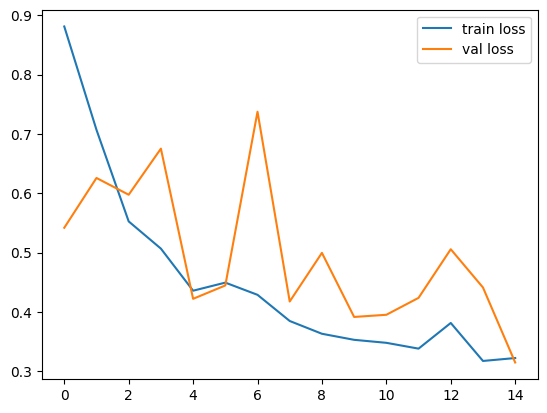

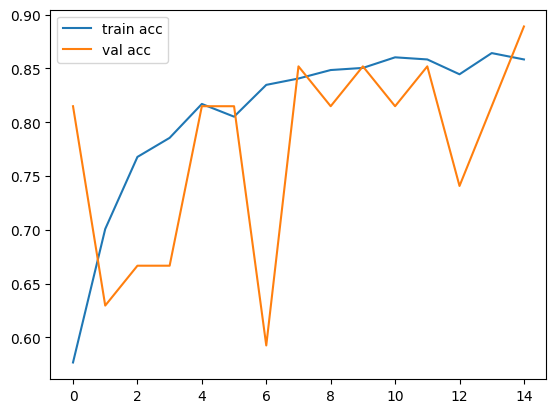

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
cnn.save('model_brittle_ductile.h5')

In [ ]:
# load model
from tensorflow.keras.models import load_model
model = load_model('model_brittle_ductile.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:/Accelerators/Ductile Overall till 27 feb/1-100 (2).jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 22ms/step


In [ ]:
result

array([[-1.3230482]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is brittle")
else:
    print("The image classified is ductile")

The image classified is brittle


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/272213/python work/Complete-Deep-Learning-master/PC_ABS.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [ ]:
result

array([[-4.2715425]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is brittle")
else:
    print("The image classified is ductile")

The image classified is brittle


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/272213/python work/Complete-Deep-Learning-master/dc.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 23ms/step


In [ ]:
result

array([[0.67538375]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is brittle")
else:
    print("The image classified is ductile")

The image classified is ductile


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/272213/python work/Complete-Deep-Learning-master/Picture1.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0]<0:
    print("The image classified is brittle")
else:
    print("The image classified is ductile")

1/1 [==============================] - 0s 22ms/step
The image classified is brittle


In [ ]:
#Making a fucntion fit
def fit(p):
    test_image = image.load_img(p, target_size = (64,64))
    test_image = image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    if result[0]<0:
        print("The image classified is brittle")
    else:
        print("The image classified is ductile")

    return(result)

In [ ]:
fit("C:/Users/272213/python work/Complete-Deep-Learning-master/1.jpg")

1/1 [==============================] - 0s 14ms/step
The image classified is brittle


array([[-2.7342427]], dtype=float32)

In [ ]:
fit("C:/Users/272213/python work/Complete-Deep-Learning-master/PC_ABS.jpg")

1/1 [==============================] - 0s 65ms/step
The image classified is brittle


array([[-4.2715425]], dtype=float32)

In [ ]:
fit("C:/Users/272213/python work/Complete-Deep-Learning-master/4.jpg")

1/1 [==============================] - 0s 74ms/step
The image classified is ductile


array([[0.14398804]], dtype=float32)

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the paths to the labeled and unlabeled data folders
labeled_data_folder = 'D:/Accelerators/Label/acc/Vehicle_5_classes_sample/mix/labeled/'
unlabeled_data_folder = 'D:/Accelerators/Label/acc/Vehicle_5_classes_sample/mix/unlabeled/'

# Define the function to extract labels from XML annotations
import xml.etree.ElementTree as ET

def extract_label_from_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    label = root.findtext('object/name')
    return label

# Define the function to load images
from PIL import Image

def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to the desired size
    img_array = np.array(img)
    return img_array

# Step 1: Load labeled data with annotations
labeled_images = []
labeled_labels = []

# Read labeled data folder
for filename in os.listdir(labeled_data_folder):
    if filename.endswith('.xml'):
        xml_path = os.path.join(labeled_data_folder,filename)
        image_filename = filename[:-4] + '.jpg'
        #image_path = os.path.join(labeled_data_folder, image_filename)

        # Load image and append to the labeled data
        #image = load_image(image_path)
        labeled_images.append(image)

        # Extract label from XML and append to the labeled labels
        label = extract_label_from_xml(xml_path)
        labeled_labels.append(label)

labeled_images = np.array(labeled_images)
labeled_labels = np.array(labeled_labels)

# Step 2: Load unlabeled data
unlabeled_images = []

# Read unlabeled data folder
for filename in os.listdir(unlabeled_data_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(unlabeled_data_folder, filename)

        # Load image and append to the unlabeled data
        image = load_image(image_path)
        unlabeled_images.append(image)

unlabeled_images = np.array(unlabeled_images)

# Step 3: Split the labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    labeled_images, labeled_labels, test_size=0.2, random_state=42
)

# Step 4: Train an initial model on the labeled data
num_classes = len(np.unique(y_labeled))
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(224, 224, 3)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_labeled, y_labeled, epochs=10)

# Step 5: Apply active learning iterations
batch_size = 10  # Define the batch size for labeling

while len(X_unlabeled) > 0:
    # Step 5.1: Use the current model to predict labels for the unlabeled data
    predictions = model.predict(X_unlabeled)

    # Step 5.2: Compute uncertainties based on prediction probabilities (e.g., using entropy)
    uncertainties = -np.sum(predictions * np.log2(predictions), axis=1)

    # Step 5.3: Select samples with highest uncertainty for labeling
    num_samples = min(len(X_unlabeled), batch_size)  # Define the batch size for labeling
    selected_indices = np.argsort(uncertainties)[-num_samples:]
    selected_samples = X_unlabeled[selected_indices]

    # Step 5.4:Assign the selected samples to an oracle for labeling
    labels = oracle_labeling(selected_samples)

    # Step 5.5: Add the newly labeled samples to the labeled dataset
    X_labeled = np.concatenate((X_labeled, selected_samples), axis=0)
    y_labeled = np.concatenate((y_labeled, labels), axis=0)

    # Step 5.6: Remove the newly labeled samples from the unlabeled dataset
    X_unlabeled = np.delete(X_unlabeled, selected_indices, axis=0)

    # Step 5.7: Retrain the model using the updated labeled dataset
    model.fit(X_labeled, y_labeled, epochs=10)

# Step 6: Evaluate the final model on a separate test set
X_test = ...
y_test = ...
accuracy = accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1))
print("Final model accuracy:", accuracy)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Step 1: Load labeled data with annotations
labeled_images = []
labeled_labels = []

# Read labeled data folder
for filename in os.listdir(labeled_data_folder):
    if filename.endswith('.xml'):
        # Extract image and label information from XML annotations
        image_path = os.path.join(labeled_data_folder, filename[:-4] + '.jpg')
        label = extract_label_from_xml(os.path.join(labeled_data_folder, filename))

        # Load image and append to the labeled data
        image = load_image(image_path)
        labeled_images.append(image)
        labeled_labels.append(label)

labeled_images = np.array(labeled_images)
labeled_labels = np.array(labeled_labels)

# Step 2: Load unlabeled data
unlabeled_images = []

# Read unlabeled data folder
for filename in os.listdir(unlabeled_data_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(unlabeled_data_folder, filename)

        # Load image and append to the unlabeled data
        image = load_image(image_path)
        unlabeled_images.append(image)

unlabeled_images = np.array(unlabeled_images)

# Step 3: Split the labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    labeled_images, labeled_labels, test_size=0.2, random_state=42
)

# Step 2: Train an initial model on the labeled data
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_labeled, y_labeled, epochs=10)

# Step 3: Apply active learning iterations
while len(X_unlabeled) > 0:
    # Step 3.1: Use the current model to predict labels for the unlabeled data
    predictions = model.predict(X_unlabeled)

    # Step 3.2: Compute uncertainties based on prediction probabilities (e.g., using entropy)
    uncertainties = -np.sum(predictions * np.log2(predictions), axis=1)

    # Step 3.3: Select samples with highest uncertainty for labeling
    selected_indices = np.argsort(uncertainties)[-num_samples:]
    selected_samples = X_unlabeled[selected_indices]

    # Step 3.4: Assign the selected samples to an oracle for labeling
    labels = oracle_labeling(selected_samples)

    # Step 3.5: Add the newly labeled samples to the labeled dataset
    X_labeled = np.concatenate((X_labeled, selected_samples), axis=0)
    y_labeled = np.concatenate((y_labeled, labels), axis=0)

    # Step 3.6: Remove the newly labeled samples from the unlabeled dataset
    X_unlabeled = np.delete(X_unlabeled, selected_indices, axis=0)

    # Step 3.7: Retrain the model using the updated labeled dataset
    model.fit(X_labeled, y_labeled, epochs=10)

# Step 4: Evaluate the final model on a separate test set
accuracy = accuracy_score(y_test, model.predict_classes(X_test))
print("Final model accuracy:", accuracy)

NameError: name 'extract_label_from_xml' is not defined